# Steps need to be followed
-  Data Preperation and EDA
-  spliting the data into Train and test
-  Residual Analysis
-  Model Evaluation

# Data Preperation

In [243]:
import pandas as pd
import seaborn as sns
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
warnings.filterwarnings("ignore")

In [150]:
data = "day.csv"

In [151]:
df = pd.read_csv(data)

In [152]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [153]:
df.shape

(730, 16)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [155]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


## Dropping unwanted column
- instant and dteday

In [156]:
unwanted_columns = ["instant","dteday"]

In [157]:
df.drop(columns=unwanted_columns,inplace=True)

In [158]:
numeric_columns = ["temp","atemp","hum","windspeed"]

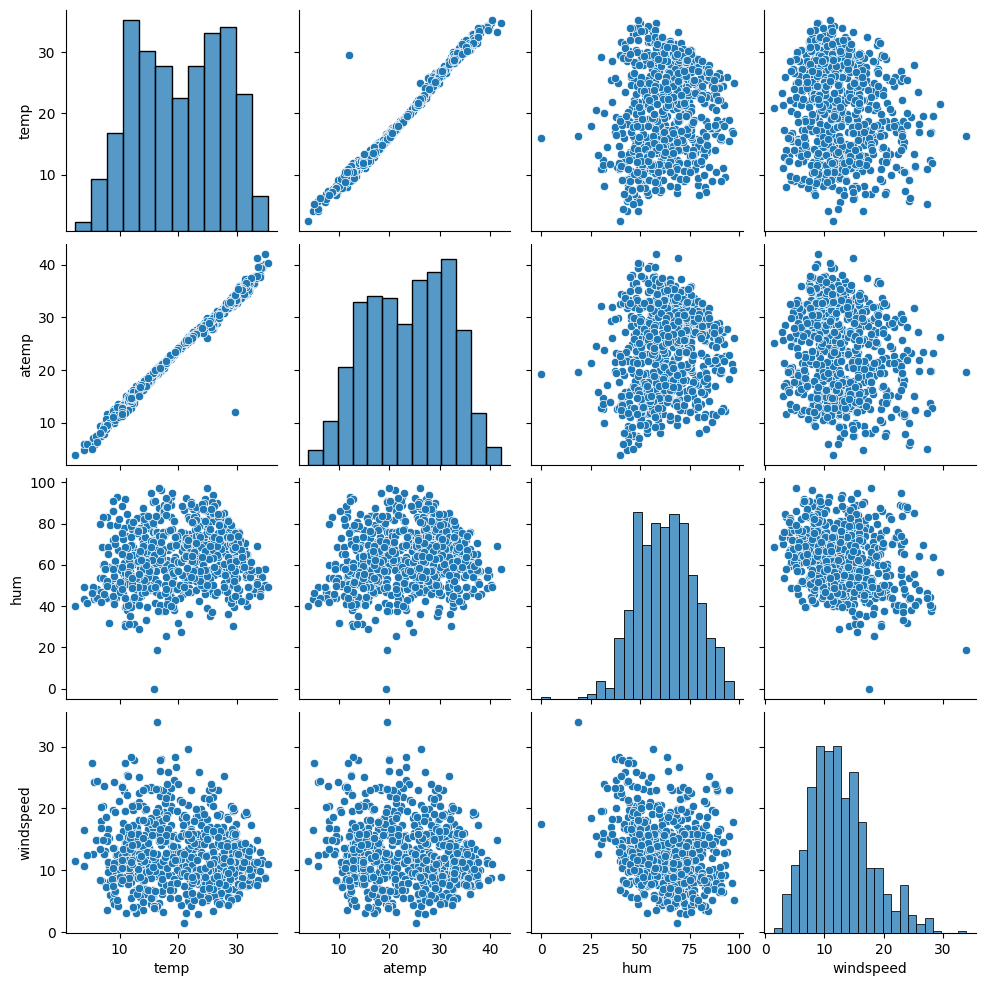

In [159]:
sns.pairplot(df[numeric_columns])

<Axes: >

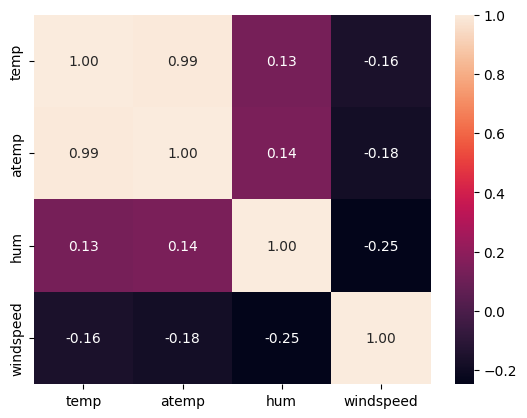

In [160]:
sns.heatmap(df[numeric_columns].corr(),annot=True,fmt=".2f")

- we could see a big correlation between the features "temp" and "atemp" so we can drop a column 
    we are dropping atempin this case

In [161]:
df.drop(columns=["atemp"],inplace=True)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  casual      730 non-null    int64  
 11  registered  730 non-null    int64  
 12  cnt         730 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 74.3 KB


<Axes: xlabel='hum', ylabel='Density'>

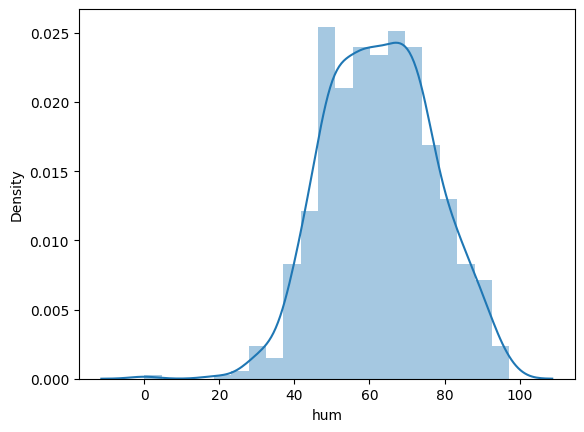

In [167]:
sns.distplot(df.hum)

<Axes: xlabel='windspeed', ylabel='Density'>

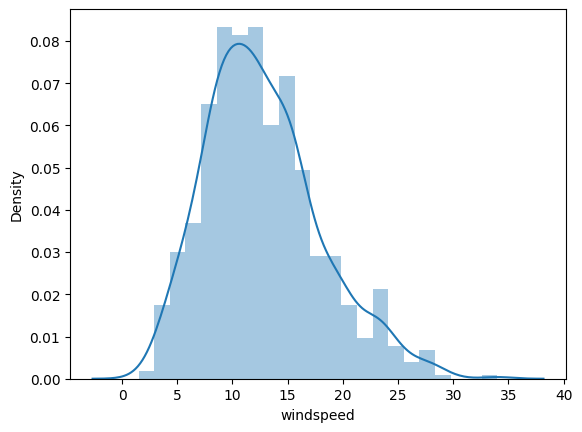

In [168]:
sns.distplot(df.windspeed)

<Axes: xlabel='season', ylabel='cnt'>

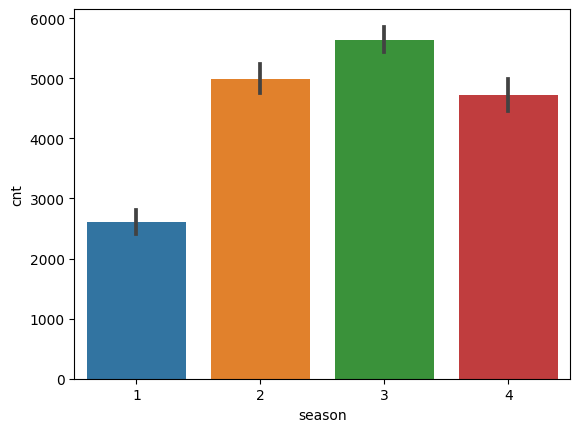

In [169]:
sns.barplot(data=df,x= df.season,y= df.cnt)

<Axes: >

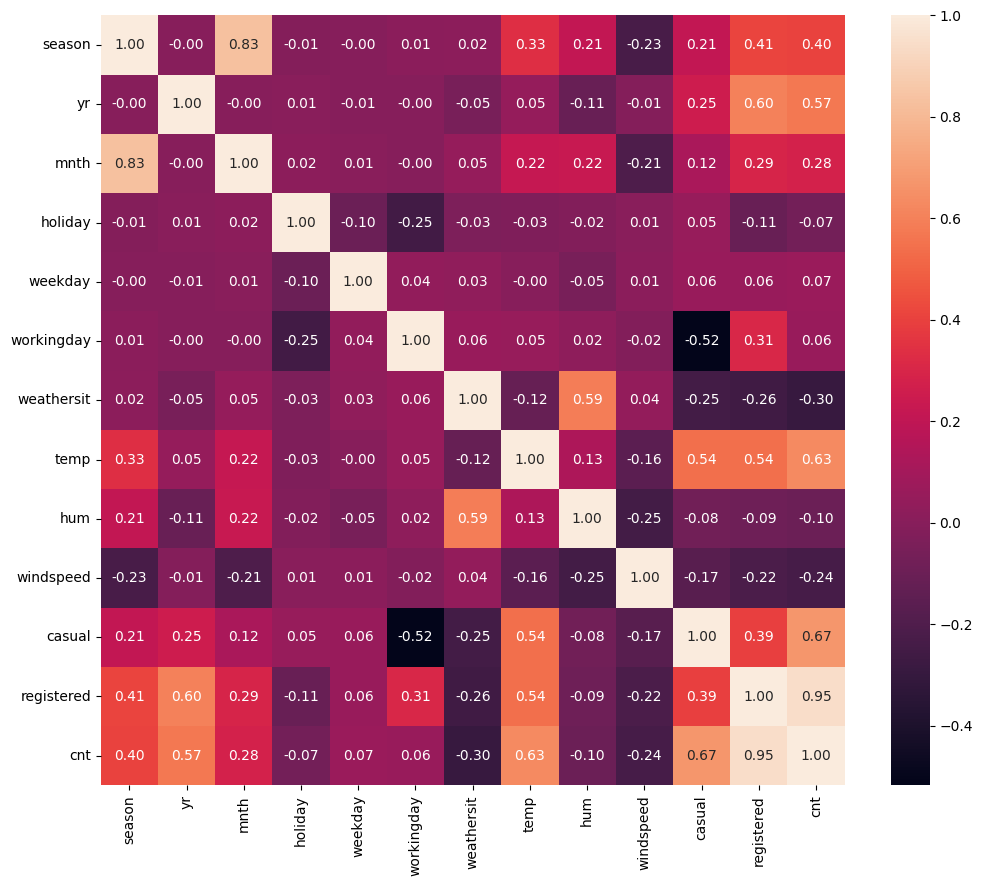

In [170]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,fmt=".2f")

<Axes: xlabel='yr', ylabel='cnt'>

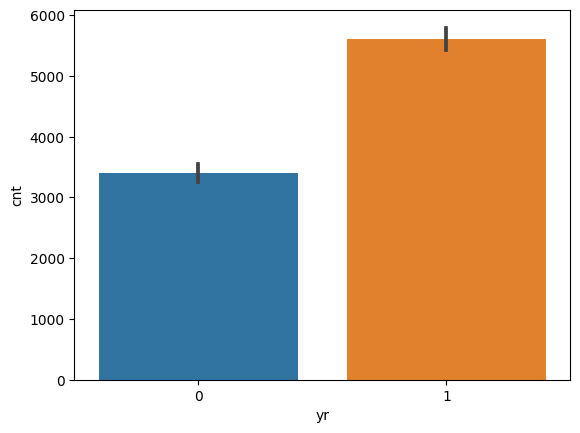

In [172]:
sns.barplot(x=df["yr"],y=df["cnt"])

In [173]:
df.season = df.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

In [174]:
df.mnth= df.mnth.map({1:"jan",2:"feb",3:"mar",4:"apr",5:"may",6:"jun",7:"jul",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"})

In [175]:
df.weekday= df.weekday.map({0:"mon",1:"Tue",2:"wed",3:"Thrus",4:"Fri",5:"Sat",6:"Sun"})

In [176]:
df.weathersit = df .weathersit.map({1:"clear",2:"mist",3:"light_snow"})

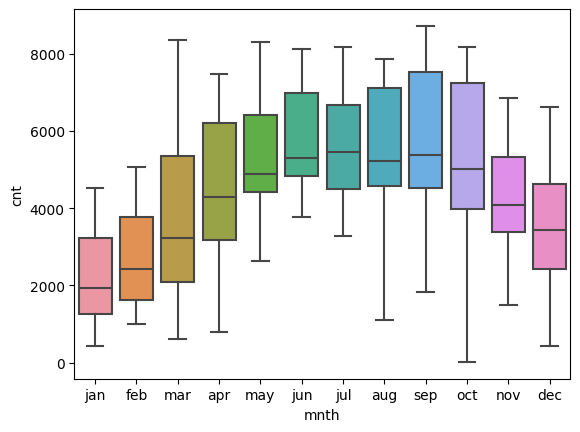

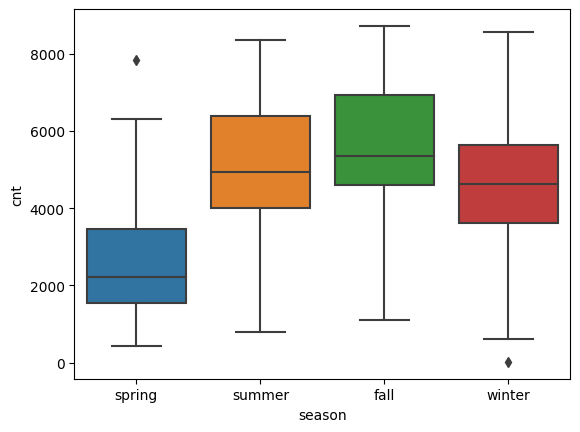

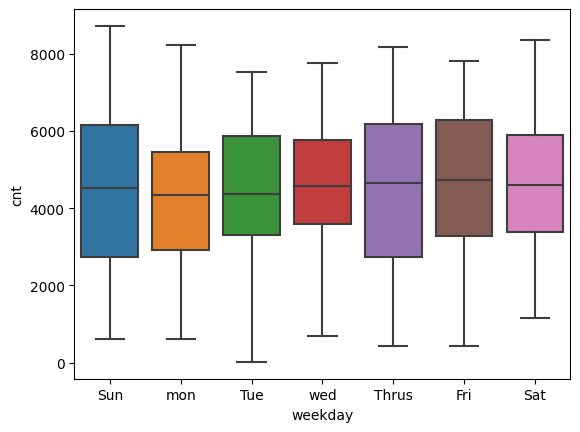

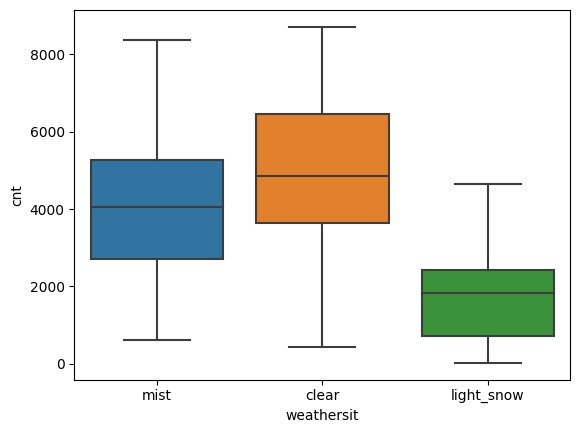

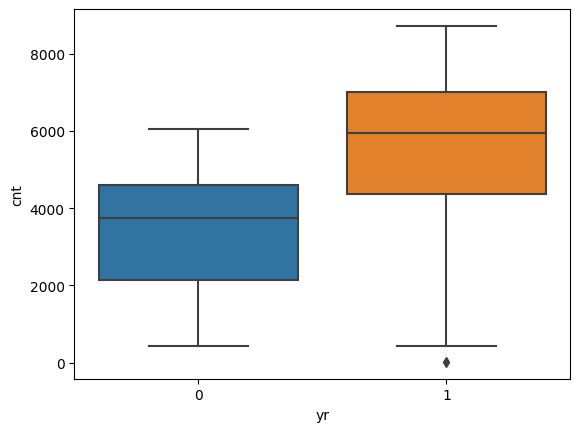

In [177]:
sns.boxplot(data=df,x=df["mnth"],y=df["cnt"])
plt.show()
sns.boxplot(data=df,x=df["season"],y=df["cnt"])
plt.show()
sns.boxplot(data=df,x=df["weekday"],y=df["cnt"])
plt.show()
sns.boxplot(data=df,x=df["weathersit"],y=df["cnt"])
plt.show()
sns.boxplot(data=df,x=df["yr"],y=df["cnt"])
plt.show()


In [179]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,Sun,0,mist,14.110847,80.5833,10.749882,331,654,985
1,spring,0,jan,0,mon,0,mist,14.902598,69.6087,16.652113,131,670,801
2,spring,0,jan,0,Tue,1,clear,8.050924,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,wed,1,clear,8.200000,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,Thrus,1,clear,9.305237,43.6957,12.522300,82,1518,1600


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  casual      730 non-null    int64  
 11  registered  730 non-null    int64  
 12  cnt         730 non-null    int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 74.3+ KB


## creating Dummy variables using PD.GET_DUMMIES

In [180]:
season = pd.get_dummies(df["season"],drop_first=True)
weathersit = pd.get_dummies(df["weathersit"],drop_first=True)
mnth = pd.get_dummies(df["mnth"],drop_first=True)
weekday = pd.get_dummies(df["weekday"],drop_first = True)

In [181]:
df = pd.concat([df,season,weathersit,mnth,weekday],axis=1)

In [182]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,may,nov,oct,sep,Sat,Sun,Thrus,Tue,mon,wed
0,spring,0,jan,0,Sun,0,mist,14.110847,80.5833,10.749882,...,0,0,0,0,0,1,0,0,0,0
1,spring,0,jan,0,mon,0,mist,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,jan,0,Tue,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,wed,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,1
4,spring,0,jan,0,Thrus,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,Fri,1,mist,10.420847,65.2917,23.458911,...,0,0,0,0,0,0,0,0,0,0
726,spring,1,dec,0,Sat,1,mist,10.386653,59.0000,10.416557,...,0,0,0,0,1,0,0,0,0,0
727,spring,1,dec,0,Sun,0,mist,10.386653,75.2917,8.333661,...,0,0,0,0,0,1,0,0,0,0
728,spring,1,dec,0,mon,0,clear,10.489153,48.3333,23.500518,...,0,0,0,0,0,0,0,0,1,0


In [183]:
# as we have the dummy varaibles we are dropping the extra column

df.columns

df.drop(columns = ["weathersit","mnth","season","weekday"],inplace=True)

In [184]:
# Checking the shape of the df 

df.shape

(730, 31)

In [185]:
# checking the values in the dataframe

df.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,spring,...,may,nov,oct,sep,Sat,Sun,Thrus,Tue,mon,wed
0,0,0,0,14.110847,80.5833,10.749882,331,654,985,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,131,670,801,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120,1229,1349,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,108,1454,1562,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,82,1518,1600,1,...,0,0,0,0,0,0,1,0,0,0


<Axes: >

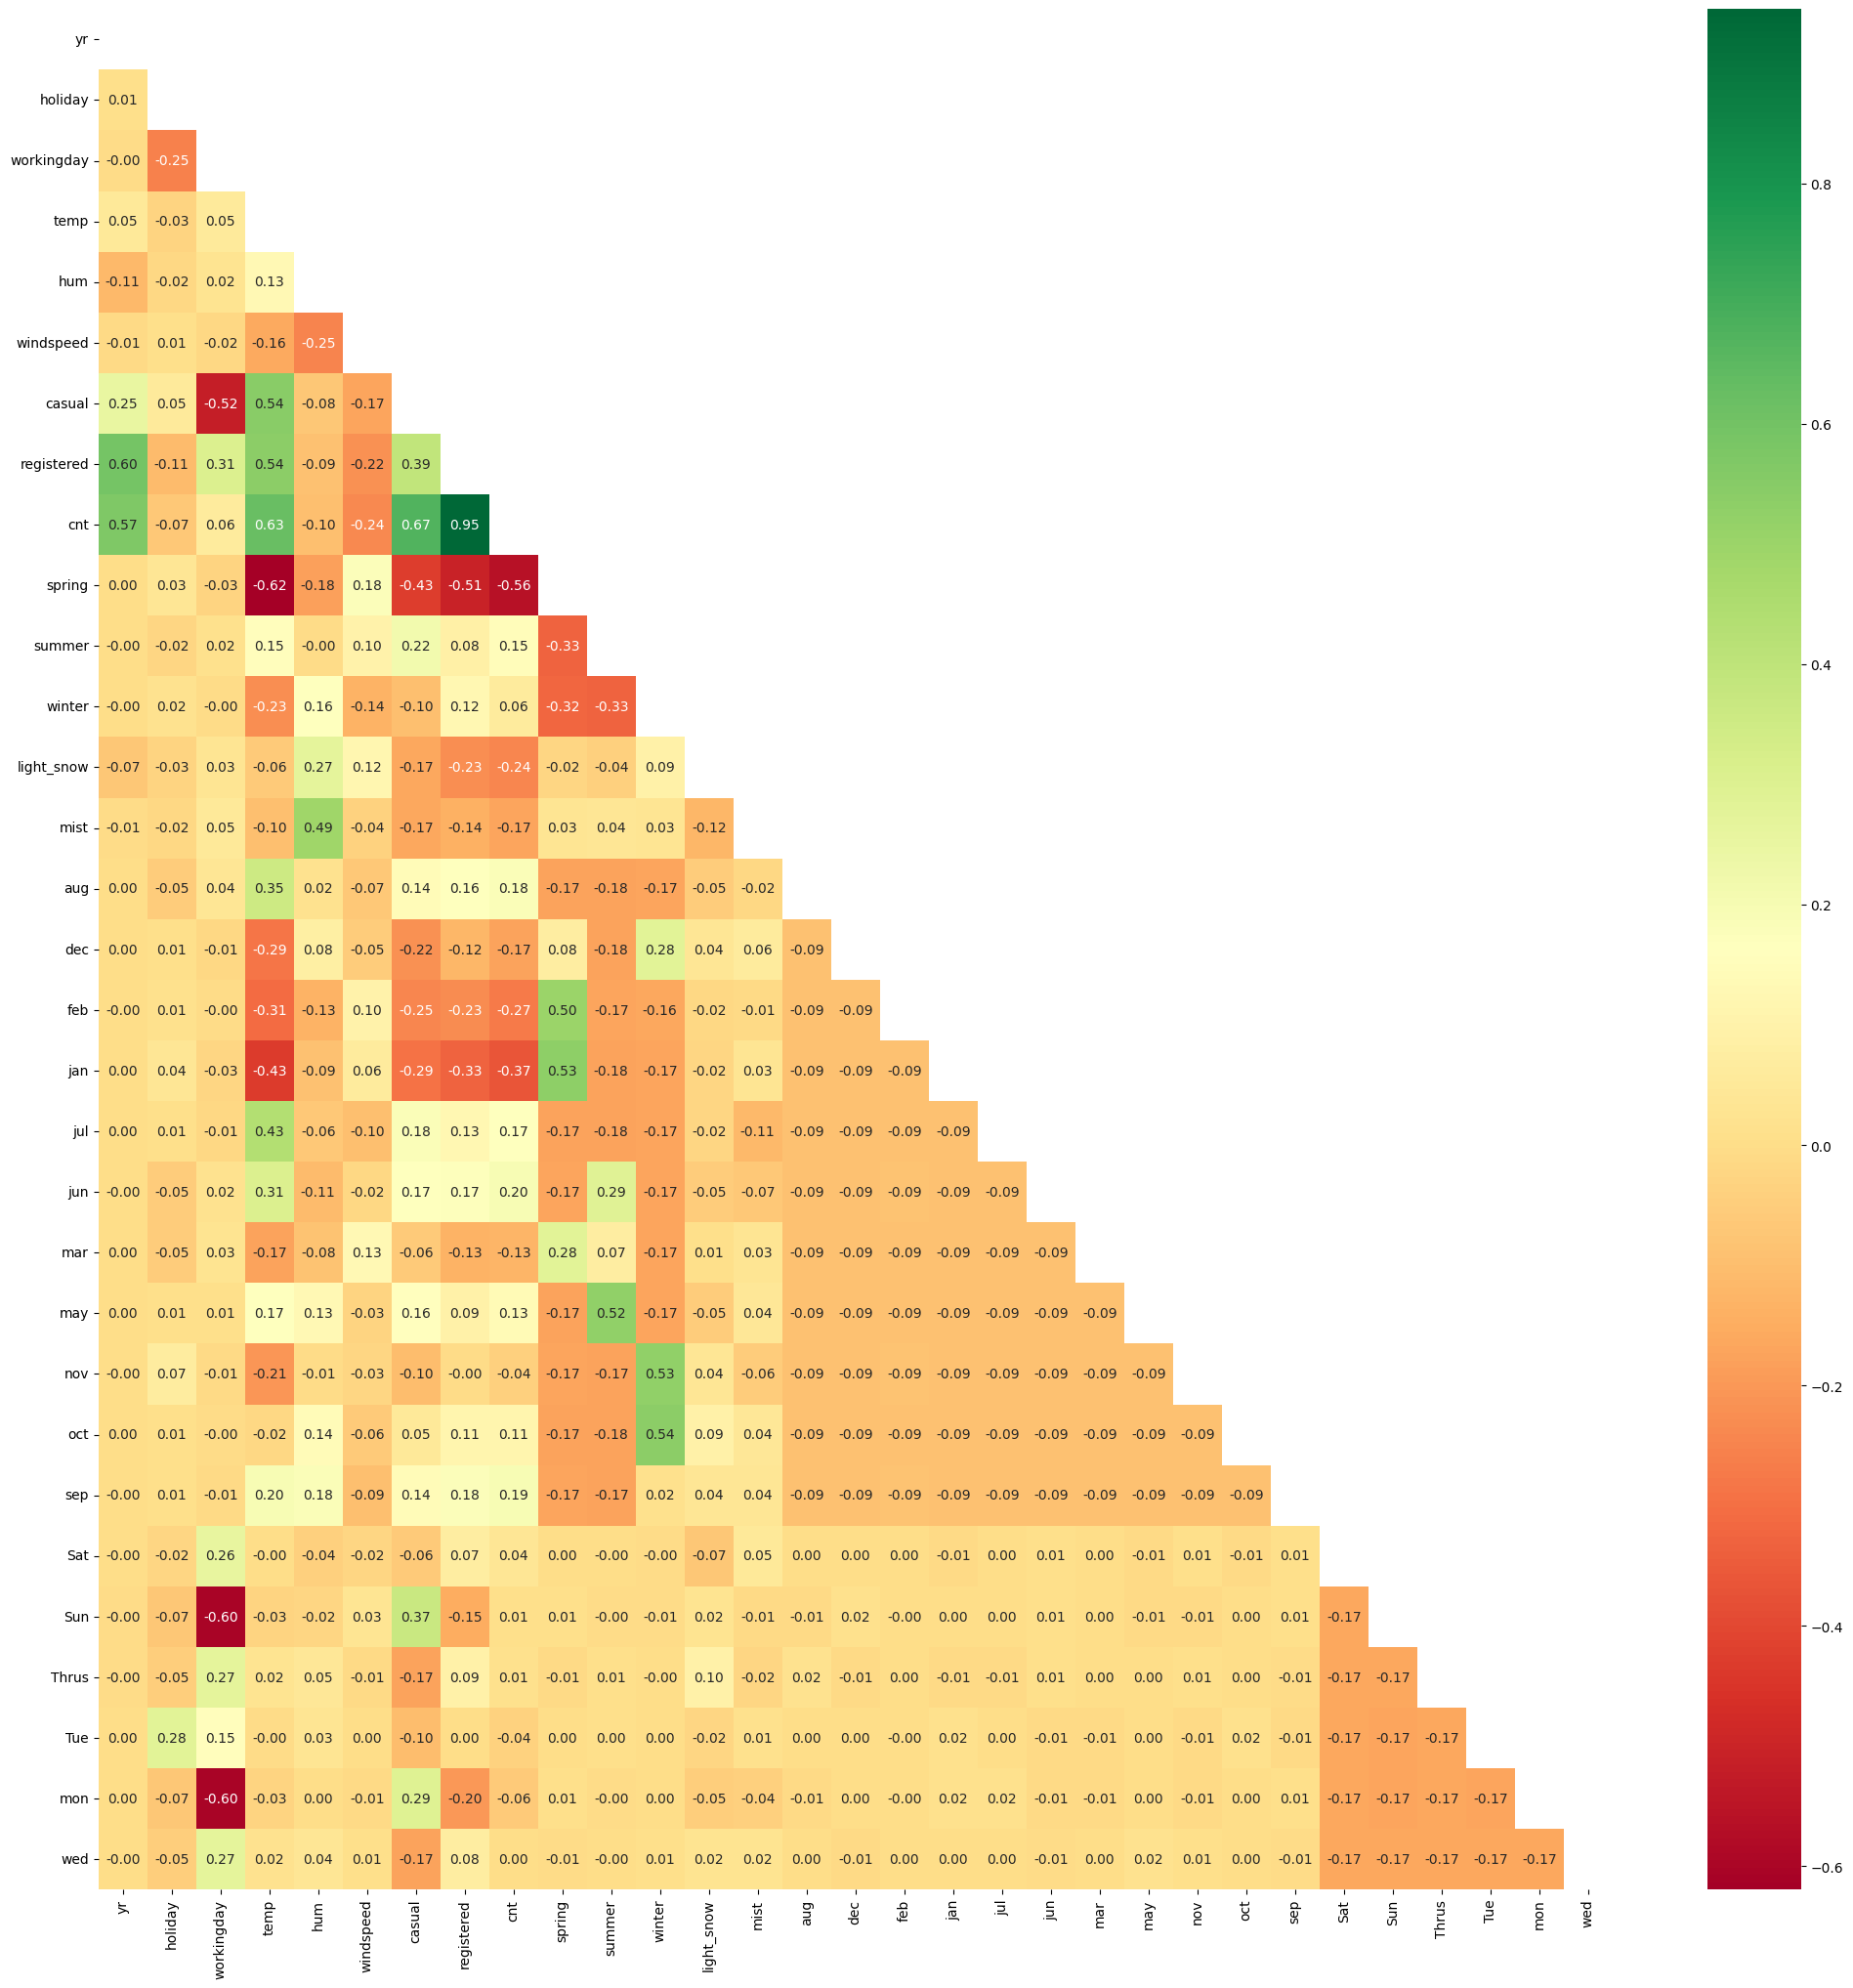

In [187]:
plt.figure(figsize=(25,25))
mask = np.triu(df.corr())
sns.heatmap(df.corr(),annot=True,fmt=".2f",mask= mask,cmap="RdYlGn")

- we could see the casual,temp and registered are Highly correlated to the cnt(Target) 
- registered and casual having 95% and 67% correlation respectively

### Finding the linear plot for cnt and temp and others

<Axes: xlabel='temp', ylabel='cnt'>

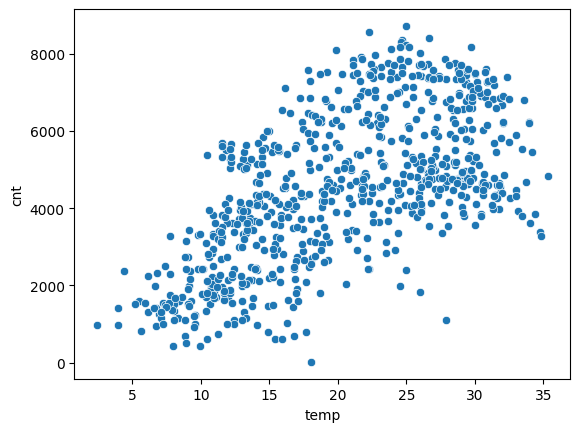

In [190]:
sns.scatterplot(data=df, x=df["temp"],y=df["cnt"])

<Axes: xlabel='casual', ylabel='cnt'>

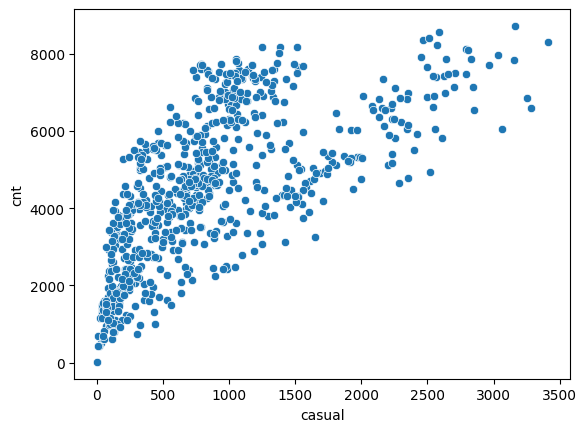

In [192]:
sns.scatterplot(data=df, x=df["casual"],y=df["cnt"])

<Axes: xlabel='registered', ylabel='cnt'>

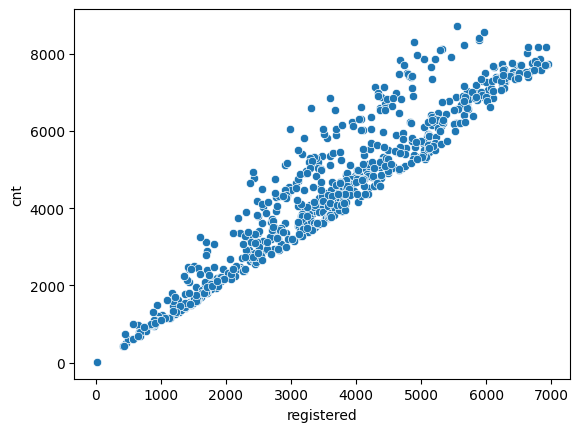

In [191]:
sns.scatterplot(data=df, x=df["registered"],y=df["cnt"])

- We could see the above variables are linear in nature so we can proceed further in creating a linear Regression Model

# Spliting the data into train and Test

In [376]:
df_train, df_test = train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)

In [377]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'spring', 'summer', 'winter', 'light_snow', 'mist',
       'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sep', 'Sat', 'Sun', 'Thrus', 'Tue', 'mon', 'wed'],
      dtype='object')

In [378]:
scaler = MinMaxScaler()

In [379]:
numeric_val = ["temp","hum","windspeed","cnt"]
df_train[numeric_val] = scaler.fit_transform(df_train[numeric_val])

In [380]:
df_train[numeric_val].describe().T

,count,mean,std,min,25%,50%,75%,max
temp,510.0,0.537262,0.225844,0.0,0.339853,0.540519,0.735215,1.0
hum,510.0,0.650369,0.145882,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320768,0.169797,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,0.513620,0.224593,0.0,0.356420,0.518638,0.684710,1.0


In [381]:
df[numeric_val].describe().T

,count,mean,std,min,25%,50%,75%,max
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021
cnt,730.0,4508.006849,1936.011647,22.000000,3169.750000,4548.500000,5966.000000,8714.000000


 - we can clearly see the difference in the rannking from the rfe after we doing scaling

In [382]:
y_train  = df_train.pop('cnt')
x_train = df_train

<Axes: >

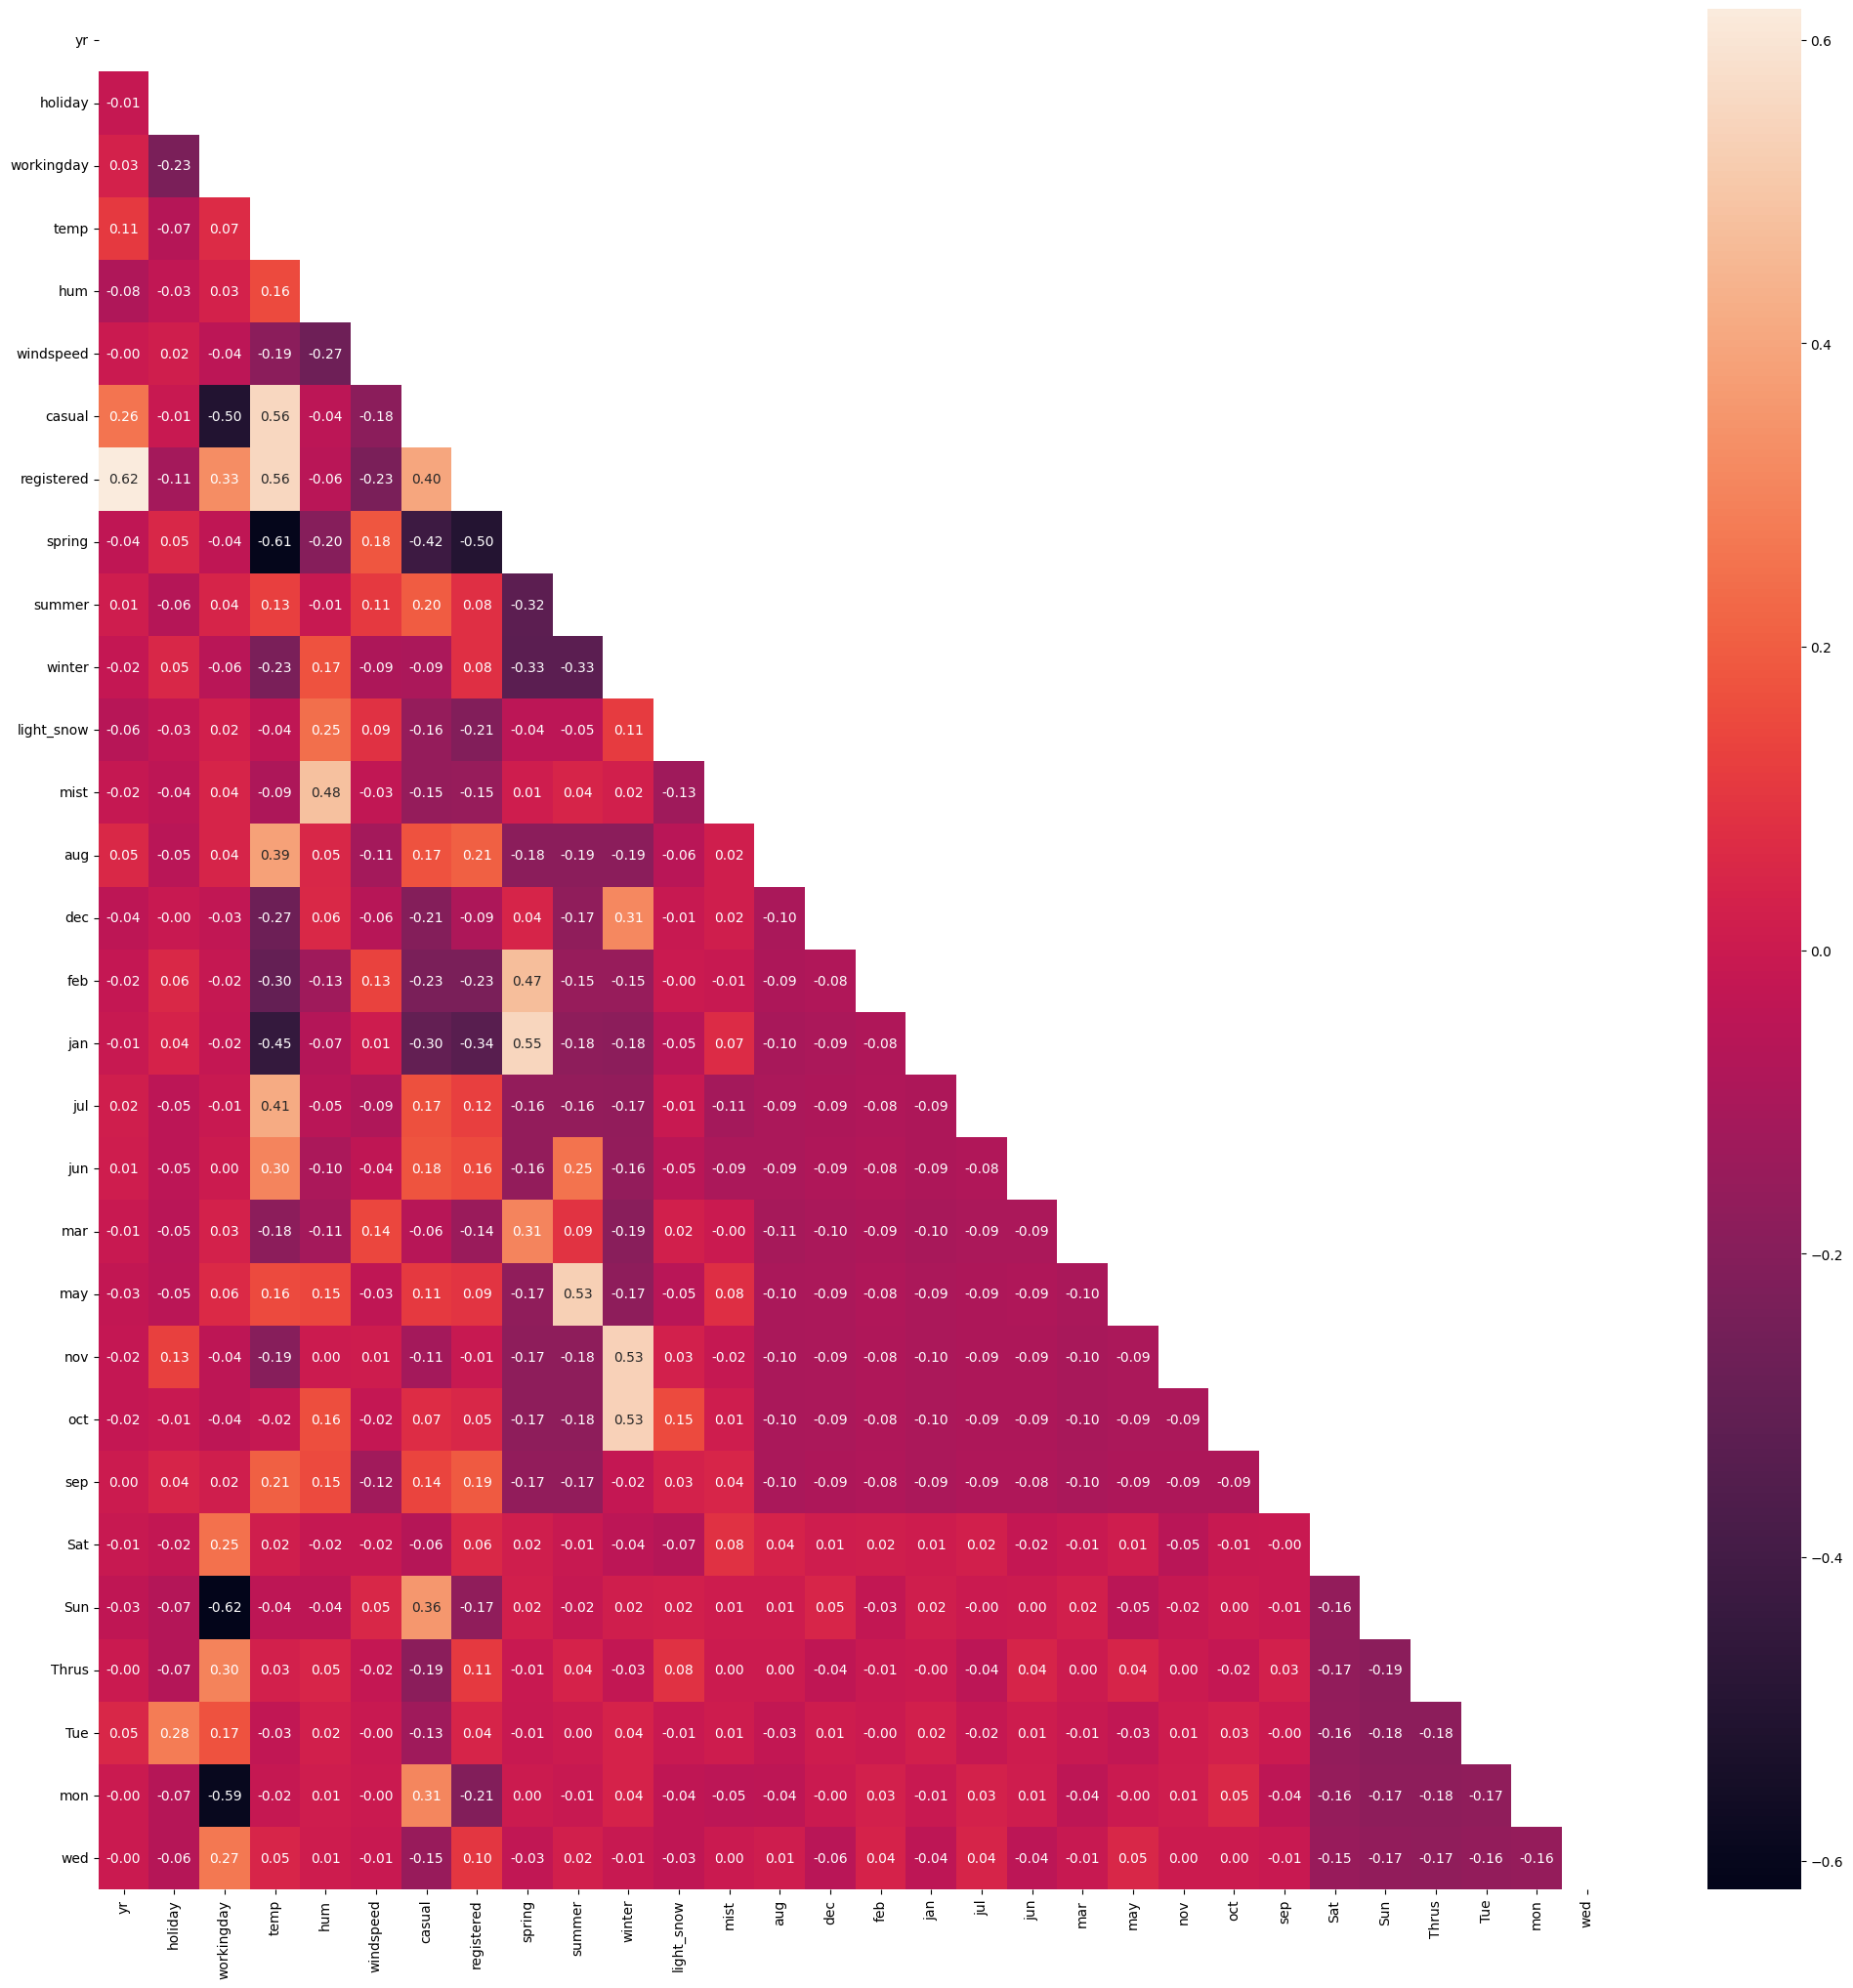

In [383]:
plt.figure(figsize=(25,25))
mask = np.triu(x_train.corr())
sns.heatmap(x_train.corr(),annot=True,fmt=".2f",mask= mask)

In [384]:
# Recursive Feature Elimination

lr = LinearRegression()
lr.fit(x_train,y_train)

rfe = RFE(estimator=lr,n_features_to_select=15,step=1)

rfe.fit(x_train,y_train)



RFE(estimator=LinearRegression(), n_features_to_select=15)

In [385]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1),
 ('spring', False, 12),
 ('summer', False, 9),
 ('winter', True, 1),
 ('light_snow', True, 1),
 ('mist', False, 5),
 ('aug', True, 1),
 ('dec', False, 14),
 ('feb', True, 1),
 ('jan', True, 1),
 ('jul', False, 4),
 ('jun', False, 13),
 ('mar', True, 1),
 ('may', False, 6),
 ('nov', False, 10),
 ('oct', False, 2),
 ('sep', False, 8),
 ('Sat', False, 15),
 ('Sun', True, 1),
 ('Thrus', False, 3),
 ('Tue', False, 16),
 ('mon', False, 11),
 ('wed', False, 7)]

In [386]:
columns_from_rfe = x_train.columns[rfe.support_]
columns_from_rfe

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'winter', 'light_snow', 'aug', 'feb', 'jan', 'mar',
       'Sun'],
      dtype='object')

In [387]:
columns_rejected_by_rfe = x_train.columns[~rfe.support_]
columns_rejected_by_rfe

Index(['spring', 'summer', 'mist', 'dec', 'jul', 'jun', 'may', 'nov', 'oct',
       'sep', 'Sat', 'Thrus', 'Tue', 'mon', 'wed'],
      dtype='object')

In [388]:
# G=creating a functiion to calculate the VIF

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

#### we are checking the values for the Features that are in the top 15 from the RFE

In [389]:
x_train_vfe_1 = x_train[columns_from_rfe]
calculateVIF(x_train_vfe_1)

,Features,VIF
7,registered,40.05
3,temp,26.95
4,hum,16.22
2,workingday,12.75
6,casual,9.20
0,yr,5.53
5,windspeed,4.18
8,winter,2.56
14,Sun,2.06
12,jan,1.75


Registered is showing high VFE so dropping the Registered

In [390]:
new_x_tarin = sm.add_constant(x_train_vfe_1)
model_1 = sm.OLS(y_train,new_x_tarin).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.654e+31
Date:                Mon, 19 Jun 2023   Prob (F-statistic):               0.00
Time:                        02:10:55   Log-Likelihood:                 17791.
No. Observations:                 510   AIC:                        -3.555e+04
Df Residuals:                     494   BIC:                        -3.548e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0025   6.66e-17   -3.8e+13      0.0

In [391]:
# Since there is a large error and the coeffecient are almost 1 removing the columns casual and registere
x_train_vfe_2 = x_train_vfe_1.drop(columns=["casual","registered"])
calculateVIF(x_train_vfe_2)

,Features,VIF
4,hum,15.86
3,temp,12.59
2,workingday,5.23
5,windspeed,4.09
0,yr,2.07
6,winter,2.05
12,Sun,1.95
10,jan,1.74
9,feb,1.41
11,mar,1.41


In [392]:
new_x_tarin_2 = sm.add_constant(x_train_vfe_2)
model_2 = sm.OLS(y_train,new_x_tarin_2).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     168.4
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          2.32e-172
Time:                        02:10:55   Log-Likelihood:                 469.15
No. Observations:                 510   AIC:                            -910.3
Df Residuals:                     496   BIC:                            -851.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3086      0.035      8.927      0.0

- we could see the standard error is very high for the column hum and it had a VFE around 16.04 so dropping the feature

In [393]:
x_train_vfe_3 = x_train_vfe_2.drop(columns=["hum"])
calculateVIF(x_train_vfe_3)

,Features,VIF
3,temp,6.10
2,workingday,4.94
4,windspeed,4.06
0,yr,2.07
11,Sun,1.90
5,winter,1.51
9,jan,1.36
7,aug,1.32
10,mar,1.31
8,feb,1.27


After dropping the column hum we could see the feature Temp is having VFE more than 5 But it seems to be one of the important feature for the bike renting so keeping
the temp feature and building another model

In [394]:
new_x_tarin_3 = sm.add_constant(x_train_vfe_3)
model_3 = sm.OLS(y_train,new_x_tarin_3).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     162.5
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          2.67e-163
Time:                        02:10:55   Log-Likelihood:                 444.93
No. Observations:                 510   AIC:                            -863.9
Df Residuals:                     497   BIC:                            -808.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1576      0.028      5.554      0.0

In [406]:
model_3.params

const         0.157582
yr            0.236507
holiday      -0.042443
workingday    0.044458
temp          0.486243
windspeed    -0.155633
winter        0.063345
light_snow   -0.258207
aug          -0.019739
feb          -0.083856
jan          -0.121912
mar          -0.027358
Sun           0.054003
dtype: float64

# Residual Analaysis

In [396]:
y_train_pred = model_3.predict(new_x_tarin_3)

In [435]:
res = y_train - y_train_pred
train_r2 = r2_score(y_train,y_train_pred)
print(f"The R2 score of the Training dataset is {train_r2}")
train_adjusted_r2 = round(1-(1-r2)*(x_train_vfe_3.shape[0]-1)/(x_train_vfe_3.shape[0]-x_train_vfe_3.shape[1]-1),4)
print(f"The Adjusted_R2 score of the Training dataset is {train_adjusted_r2}")

The R2 score of the Training dataset is 0.7968463569615843
The Adjusted_R2 score of the Training dataset is 0.7453


<Axes: ylabel='Count'>

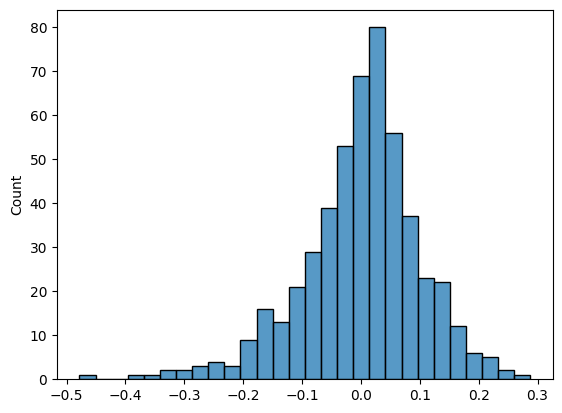

In [398]:
sns.histplot(res)

The residual follows normal Distribution

In [399]:
# dropping the columns which are not used in the Train and scaling the value with the scaler which is used to transfer the value test set also

df_test[numeric_val] = scaler.transform(df_test[numeric_val])


In [400]:
df_test[numeric_val].describe().T

,count,mean,std,min,25%,50%,75%,max
temp,219.0,0.558941,0.233698,0.046591,0.354650,0.558691,0.759096,0.984424
hum,219.0,0.638508,0.148974,0.261915,0.527265,0.627737,0.743928,1.002146
windspeed,219.0,0.313350,0.159947,-0.042808,0.198517,0.299459,0.403048,0.807474
cnt,219.0,0.520592,0.218435,0.048205,0.377531,0.524275,0.672745,0.963300


In [401]:
# Taking the Features only  from the rfe and dropping the features that are removed using VIF
# df_test = df_test[columns_from_rfe]
df_test = df_test.drop(columns = ["registered","casual","hum"],axis=1)

In [402]:
# predicting the test set using the model_3 and calculating the r2_score

y_test = df_test.pop("cnt")
x_test = df_test

In [410]:
x_test_col = x_train_vfe_3.columns

In [411]:
x_test = df_test[x_test_col]

In [413]:
x_test_sm = sm.add_constant(x_test)
y_test_pred = model_3.predict(x_test_sm)

In [436]:
test_r2= r2_score(y_test,y_test_pred)
print(f"The R2 score of the Training dataset is {test_r2}")
test_adjusted_r2 = round(1-(1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1),4)
print(f"The R2 score of the Training dataset is {test_adjusted_r2}")

The R2 score of the Training dataset is 0.7513416597622636
The R2 score of the Training dataset is 0.7369


# Model Evaluation

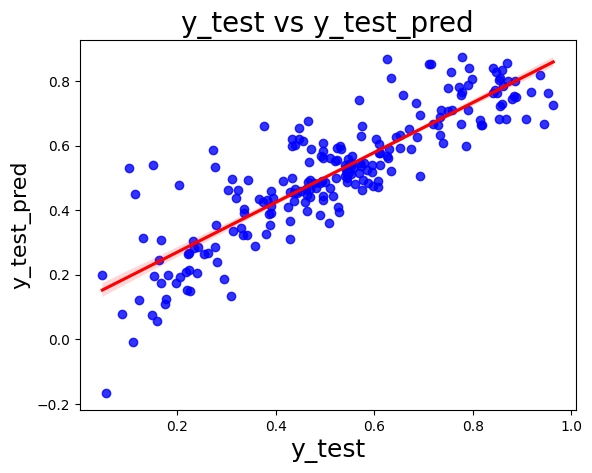

In [429]:
# Visualizing the fit on the test data
# plotting a Regression plot

sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

# Summary

### from the above Analysis we could see the following

- The R2 Score of Train dataset is 0.79
- The Adjusted r2_score of the Train Dataset is 0.74
- The R2 Score of Test dataset is 0.75
- The Adjusted r2_score of the Test Dataset is 0.73

The Features temp,workingday,windspeed,yr,sun,winter,jan,aug,mar,feb,holiday,light_snow are playing makor role in the creating the demand of the shared bikes